### The classical statistical inference pipeline:
- Formulate Hypothesis
- Design Experiment
- Collect Data
- Inference/Conclusions

## 3.1 A/B Testing

Treatment: something (drug, price, web headline) to which a subject is exposed.

Treatment group: A group of subjects exposed to a specific treatment.

Control group: A group of subjects exposed to no (or standard) treatment.

Randomization: The process of randomly assigning subjects to treatments.

Subjects: The items( web visitors, patients, etc.) that exposed to treatments.

Test statistic: The metric used to measure the effect of the treatment.

#### Why have a control group?
- Without a control group, there is no assurance that "other things are equal" and that any difference is really due to the treatment(or to chance) 

#### Why just A/B? why not C, D?
- A/B tests are popular in the marketing and ecommerce worlds.
- There are also other types of statistical experiment: additional treatments, repeated measurements, multi-arm bandit

#### Key Ideas
- Subjects are assigned to two or more groups that are treated exactly alike, except that the treatment under study differs from one to another.
- Ideally, subjects are assigned randomly to the groups.

## 3.2 Hypothesis Tests
Null hypothesis: The hypothesis that chance is to blame.

Alternative hypothesis: Counterpoint to the null(what you hope to prove).

One-way test: Hypothesis test that counts chance results only in one direction.

Two-way test: Hypothesis test that counts chance results in two directions.

We need to consider the failure to anticipate extreme events, balck swans.

- Random chance in assignment of subjects.
- A true difference between A and B.

#### The Null Hypothesis
The Null hypothesis involves a baseline assumption that the treatments are equivalent, and any difference between the groups is due to chance.

In the experimental, we want to prove the null hypothesis wrong. One way is via a resampling permutation procedure, in which we shuffle together the results from groups A and B and then repeatedly deal out the data in groups of similar sizez, then observe how often we get a difference as extreme as the observed difference.

#### Alternative Hypothesis

- Null= "no difference between the meas of group A and group B" Alternative= "A is different from B (bigger or smaller)"

- Null= "A<=B" Alternative="B>A"

- Null="B is not X% greater than A" Alternative="B is X% greater than A"

#### One way, Two-way Hypothesis Test
If we want a directional alternative hypothesis (B is better than A), we can use one-way hypothesis test. This means that extreme chance results in only one direction, direction count toward the p-value.

#### Key Ideas

- A null hypothesis is a logical constrct embodying the notion that nothing special has happend, and any effect you observe is due to random chance.

- The hypothesis test assumes that the null hypothesis is true, and tests whether the effect you observe is a reasonable outcome of that model.



## 3.3 Resampling
Permutation test: The procedure of combining two or more samples together, and randomly reallocating the observations to resamples. (Randomization test, random permutation test, exact test)

With or without replacement: In sampling, whether or not an item is returned to the sample before the next draw.

#### Permutation Test

Permute means to change the order of a set of values.

Permutation test is based on the null hypothesis that the groups were exposed do not differ.

#### Key Ideas:
- In a permutation test, multiple samples are combined, then shuffled.
- The shuffled values are then divided into resamples, and the statistic of interest is calculated.
- This process is then repeated, and the resampled statistic is tabulated.
- Comparing the observed value of the statistic to the resampled distribution allows you to judge whether an observed difference between samples might ovv

Text(0.5, 1.0, 'Sesion times for web pages A and B')

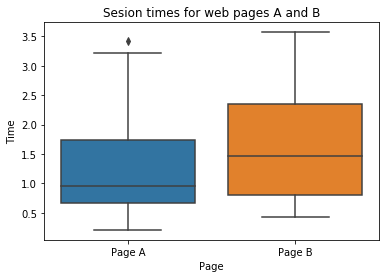

In [45]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import random

df = pd.read_csv('../Data/web_page_data.csv')

sns.boxplot(x="Page", y="Time", data=df)
plt.title("Sesion times for web pages A and B")

In [25]:
page_a = df[df.Page=="Page A"]
page_b = df[df.Page=="Page B"]

print("mean of page A: ",page_a.Time.mean())
print("mean of page B: ",page_b.Time.mean())
print("diff of mean: ",page_b.Time.mean()-page_a.Time.mean())

mean of page A:  1.2633333333333332
mean of page B:  1.62
diff of mean:  0.3566666666666669


Text(0.5, 1.0, 'Frequency distribution for session time differences between page A and B')

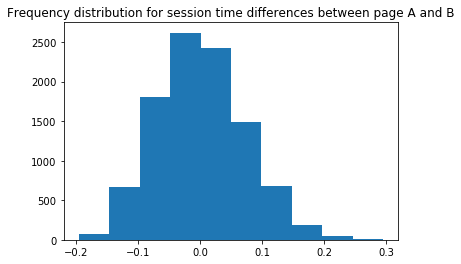

In [78]:
def perm_fun(n,size1,size2):
    np.random.shuffle(n)
    n1=n[:size1]
    n2=n[-size2:]
    return n1.mean()-n2.mean()

num=10000
diff=page_b.Time.mean()-page_a.Time.mean()
diff=[]
n=np.array(df.Time)
for i in range(num):
    diff.append(perm_fun(n,page_a.size,page_b.size))
    

plt.hist(diff)
plt.title("Frequency distribution for session time differences between page A and B")